In [1]:
import os
import pandas as pd
import tensorflow as tf
import subprocess
import pickle
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from train import train_lnphi


In [2]:

# Load and prepare training data
LNPHI_PATH = r"E:\Datasets"
datafile_name = r"nC4_data_nC4-nC10_T300-650_P5-100_x0-1_20200915-111553.csv"
# nC10_data_nC4-nC10_PTx_range_20200822-113453.csv
log_save_dir = r"C:\Users\win7\Desktop\logs"

tr = train_lnphi()
tr.load_lnphi_data(LNPHI_PATH, datafile_name)
#tr.lnphi_range(-10, 10)
tr.split_data()
tr.feature_eng()

Loading done. Shape: (30944164, 5)
Splitting done.
Feature Eng done.


In [3]:
list(tr.X_train)

['a_mix', 'b_mix', 'b_i', 'sum']

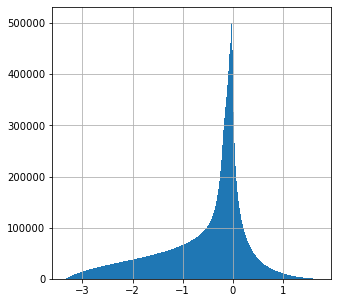

In [4]:
tr.lnphi['lnphi'].hist(bins=500, figsize=(5,5))
plt.show()

In [5]:
tr.lnphi['lnphi'].describe()

count    3.094416e+07
mean    -5.674223e-01
std      8.671698e-01
min     -3.345515e+00
25%     -1.019506e+00
50%     -2.418318e-01
75%     -2.024817e-02
max      1.713882e+00
Name: lnphi, dtype: float64

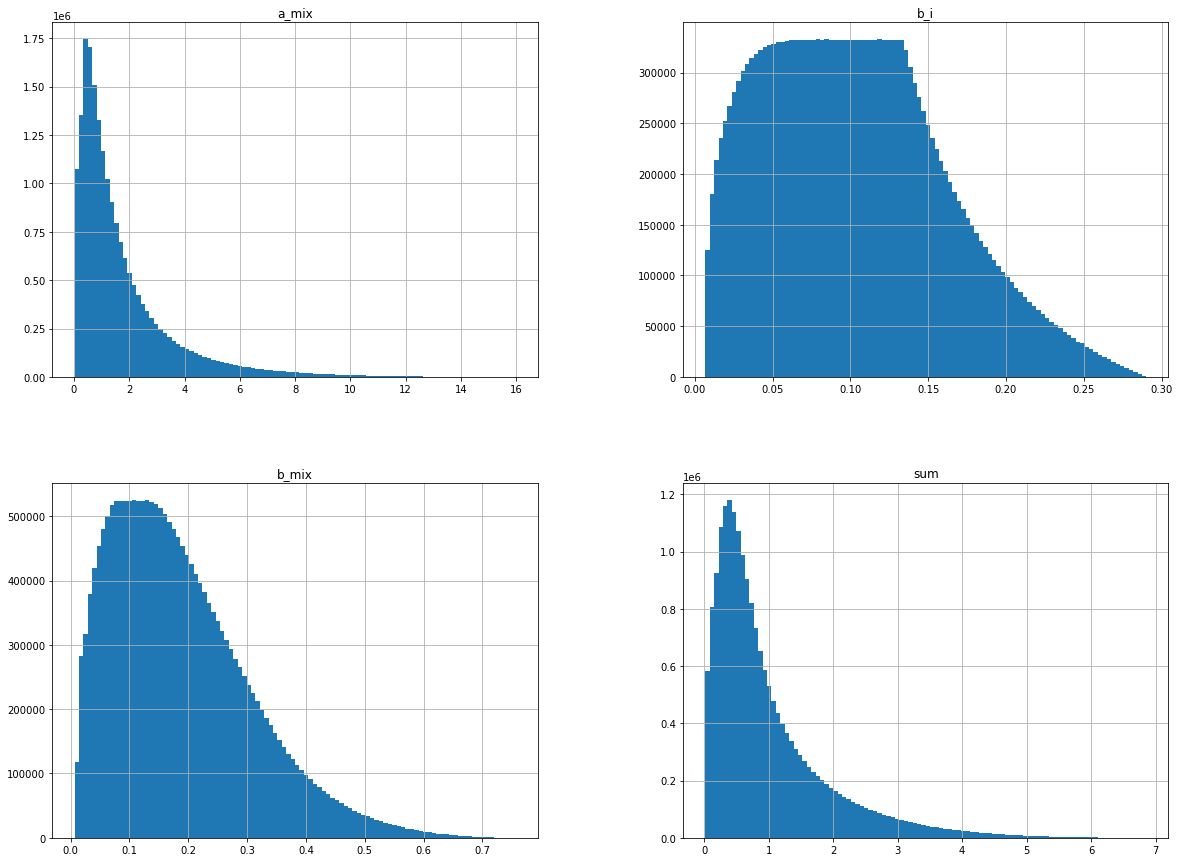

In [6]:
# Note: Histogram may have empty bins. This is an effect of bin resolution, and does not necessarily mean
# the distribution has a gap.
import matplotlib.pyplot as plt
d = pd.DataFrame(tr.X_train, columns=list(tr.X_train))
d.hist(bins=100, figsize=(20,15))
plt.show()

In [7]:
d.describe()

,a_mix,b_mix,b_i,sum
count,1.980426e+07,1.980426e+07,1.980426e+07,1.980426e+07
mean,1.741724e+00,1.876096e-01,1.037015e-01,1.000336e+00
std,1.802350e+00,1.185305e-01,5.789520e-02,9.033024e-01
min,1.831612e-02,6.696998e-03,6.696998e-03,1.831612e-02
25%,5.679408e-01,9.542725e-02,5.685025e-02,3.826800e-01
50%,1.139818e+00,1.669709e-01,9.910175e-02,7.064961e-01
75%,2.229935e+00,2.572747e-01,1.418776e-01,1.318191e+00
max,1.597686e+01,7.564222e-01,2.902033e-01,6.854007e+00


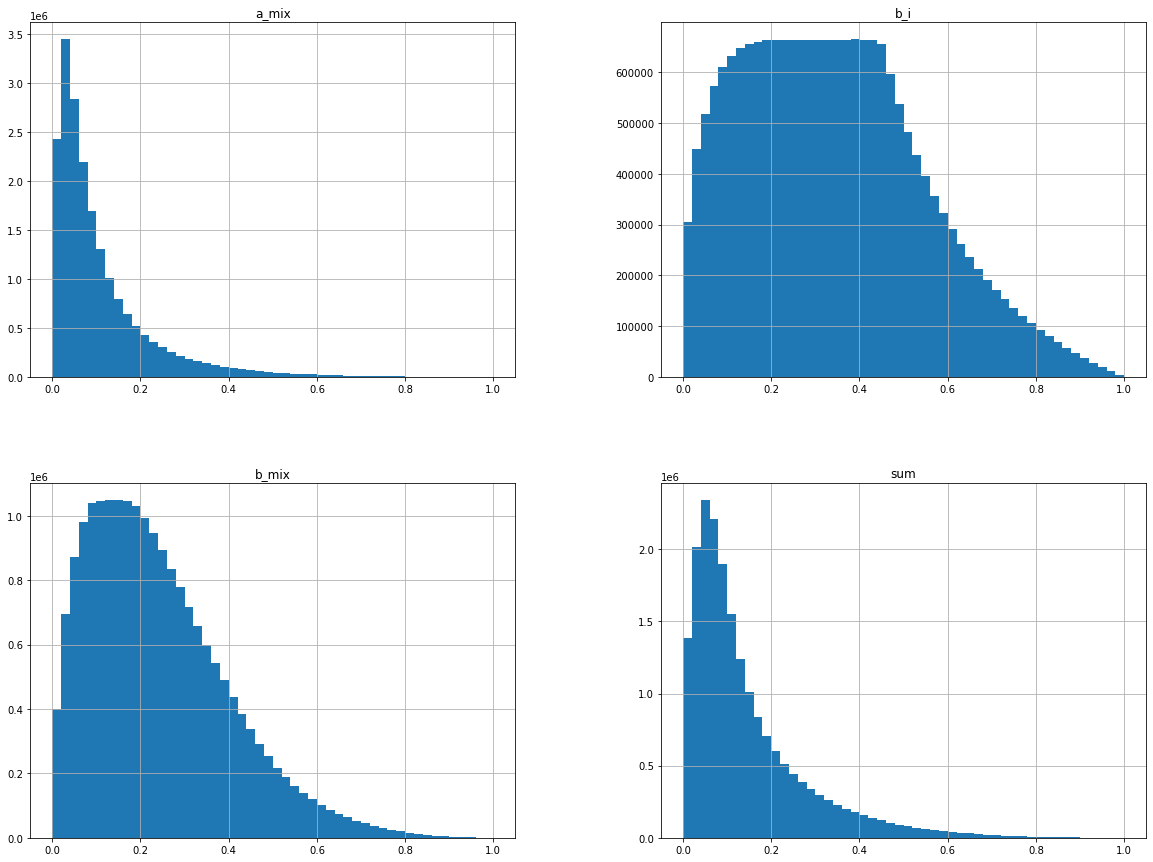

In [8]:
import matplotlib.pyplot as plt
d2 = pd.DataFrame(tr.X_train_prepared, columns=list(tr.X_train))
d2.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
'''d2.describe()'''

'd2.describe()'

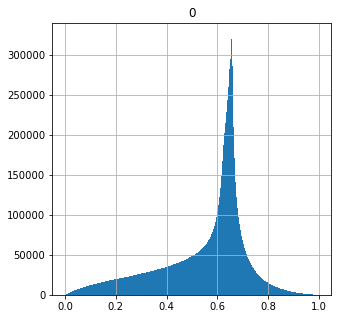

In [10]:

d3 = pd.DataFrame(tr.y_train_prepared)
d3.hist(bins=500, figsize=(5,5))
plt.show()

In [11]:
d3.describe()

,0
count,1.980426e+07
mean,5.490914e-01
std,1.714013e-01
min,0.000000e+00
25%,4.597014e-01
50%,6.134438e-01
75%,6.572502e-01
max,1.000000e+00


In [12]:
'''# Load model
tr.model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642\norm_all_4096_3_40_250_20200810-195701')
# Give existing log directory
tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642'
tr.model.summary()'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 60-61: truncated \UXXXXXXXX escape (<ipython-input-12-3a1e41393f49>, line 6)

In [13]:
# Train
name_prefix = 'lnphi_nC4_layer2_node10_T300-600_P5-100_'
batch_size = 100
n_layers = 2
n_nodes = 10
epochs = 100
initial_epoch = 0 # 0 if new model

tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

New logdir created.
Train on 19804264 samples, validate on 4951067 samples
Epoch 1/100

Epoch 00001: mse improved from inf to 0.00027, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938\assets
19804264/19804264 - 262s - loss: 2.7208e-04 - mse: 2.7208e-04 - mae: 0.0089 - mean_absolute_percentage_error: 3.0448 - val_loss: 6.2500e-05 - val_mse: 6.2500e-05 - val_mae: 0.0057 - val_mean_absolute_percentage_error: 1.7086
Epoch 2/100

Epoch 00002: mse improved from 0.00027 to 0.00007, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_la

KeyboardInterrupt: 

In [14]:
# Train

batch_size = 256
n_layers = 2
n_nodes = 10
epochs = 200
initial_epoch = 99 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 19804264 samples, validate on 4951067 samples
Epoch 100/200

Epoch 00100: mse improved from inf to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938\assets
19804264/19804264 - 112s - loss: 2.9040e-05 - mse: 2.9040e-05 - mae: 0.0038 - mean_absolute_percentage_error: 1.7215 - val_loss: 2.9490e-05 - val_mse: 2.9490e-05 - val_mae: 0.0038 - val_mean_absolute_percentage_error: 1.1505
Epoch 101/200

Epoch 00101: mse improved from 0.00003 to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_nC4_layer2_node10_T300-600_P5-100__100_2_10_100_20201021-162938\assets


KeyboardInterrupt: 

In [ ]:
# Train

batch_size = 512
n_layers = 2
n_nodes = 10
epochs = 250
initial_epoch = 199 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)